In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as ply
%matplotlib inline
#matplotlib.styles.use('ggplot')

In [4]:
db_data = pd.read_csv("OPENDATA_BOOKING_CARSHARING.csv", sep = ';', header = 0)

In [3]:
db_data.tail()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
548068,46385140,100001,174185,65C0C527DD4EA6229E0D2B8E3EE8E7C9D43D037D,2017-05-16 07:00:33,2017-05-16 08:15:00,2017-05-16 09:15:00,Nein,Nein,NaN,Parkraumquartier Bellevue,405417,Parkraumquartier Bellevue,405417,Station,Berlin,Flinkster Android
548069,46385327,100001,149218,B45F2CFD95C5887698AD87B6596102E24DCCE243,2017-05-16 07:15:07,2017-05-16 07:15:00,2017-05-16 08:15:00,Nein,Ja,NaN,Sredzkistraße,402667,Sredzkistraße,402667,Station,Berlin,Flinkster iPhone
548070,46385351,100001,174116,954FB74EF255E4089D3D7DA3FE6234DE781BFDD3,2017-05-16 07:16:29,2017-05-16 08:30:00,2017-05-16 12:30:00,Nein,Nein,NaN,Bf Köln Messe/Deutz,400755,Bf Köln Messe/Deutz,400755,Station,Köln,Internet
548071,46385778,100001,173552,A986BBFA0F81DD3D2EB02A97A30A97CF111BD2C1,2017-05-16 07:37:19,2017-05-16 08:45:00,2017-05-18 09:45:00,Nein,Nein,NaN,Hbf Saarbrücken,400280,Hbf Saarbrücken,400280,Station,Saarbrücken,Internet
548072,46385814,100012,169106,1127C45D5E5C398FE0BCAF07D6C6694C2C9E0B0B,2017-05-16 07:39:22,2017-05-16 07:45:00,2017-05-16 10:45:00,Nein,Nein,NaN,Hbf Gelsenkirchen,406277,Hbf Gelsenkirchen,406277,Station,Gelsenkirchen,Internet


In [4]:
#UNderstanding the data
#Count ALL the NULLS in all the columns of the data:
null_columns = db_data.columns[db_data.isnull().all()]
db_data.isnull().sum()

BOOKING_HAL_ID                   0
CATEGORY_HAL_ID                  0
VEHICLE_HAL_ID                   0
CUSTOMER_HAL_ID                  0
DATE_BOOKING                     0
DATE_FROM                        0
DATE_UNTIL                       0
COMPUTE_EXTRA_BOOKING_FEE        0
TRAVERSE_USE                     0
DISTANCE                       201
START_RENTAL_ZONE                0
START_RENTAL_ZONE_HAL_ID         0
END_RENTAL_ZONE                  0
END_RENTAL_ZONE_HAL_ID           0
RENTAL_ZONE_HAL_SRC              0
CITY_RENTAL_ZONE                 0
TECHNICAL_INCOME_CHANNEL     51976
dtype: int64

In [107]:
db_data.describe()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DISTANCE,RENTAL_ZONE_ID,TRAVERSE,EXTRA_BOOKING_FEE
count,5.480730e+05,548073.000000,548073.000000,547872.000000,548073.000000,548073.000000,548073.000000
mean,3.186900e+07,99387.465604,158833.711316,77.186951,353634.737294,0.185373,0.080748
std,7.206038e+06,8092.127076,7750.289663,159.879398,128089.698246,0.388600,0.272449
min,1.784220e+07,24.000000,143031.000000,0.000000,20.000000,0.000000,0.000000
25%,2.601109e+07,100001.000000,151336.000000,14.000000,400575.000000,0.000000,0.000000
50%,3.061083e+07,100003.000000,156818.000000,32.000000,401814.000000,0.000000,0.000000
75%,3.718012e+07,100012.000000,163398.000000,80.000000,402743.000000,0.000000,0.000000
max,4.638581e+07,801003.000000,181564.000000,27500.000000,406429.000000,1.000000,1.000000


In [6]:
#Optimizing data
db_data['TRAVERSE'] = db_data['TRAVERSE_USE'].map({'Nein' : 0 , 'Ja':1}).astype(int)
db_data['EXTRA_BOOKING_FEE']= db_data['COMPUTE_EXTRA_BOOKING_FEE'].map({'Nein': 0 , 'Ja': 1}).astype(int)
#db_data['RENTAL_ZONE_HAL_SRC']= db_data['RENTAL_ZONE_HAL_SRC'].map({'Station': 1}).astype(int)

db_data.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,TRAVERSE,EXTRA_BOOKING_FEE
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14.0,Bernkasteler Straße,401768,Bernkasteler Straße,401768,Station,Köln,Internet,0,0
1,18270895,100003,149335,045B17DDFAA4DCE1751DF14B2DFC2C3106C5E788,2013-06-25 14:12:08,2014-05-06 13:30:00,2014-05-06 19:00:00,Nein,Nein,84.0,ZOB Oldenburg,400346,ZOB Oldenburg,400346,Station,Oldenburg (Oldb),Internet,0,0
2,19054992,100012,151333,645B3B221397740C5DD3ACE9915B28D717697D1F,2013-08-01 07:20:47,2014-06-14 14:00:00,2014-06-22 10:30:00,Nein,Nein,1036.0,Hbf Stralsund,32961,Hbf Stralsund,32961,Station,Stralsund,Internet,0,0
3,19057626,100003,149540,00DF8A75463E3424010AF22F5292FB9499DBEFBD,2013-08-01 09:22:07,2014-02-01 15:00:00,2014-02-08 15:00:00,Nein,Nein,681.0,Donnersbergerbrücke,401104,Donnersbergerbrücke,401104,Station,München,Internet,0,0
4,19313282,100001,150574,6551685BE2457EC2944877C65423089CDD6EA6C2,2013-08-13 10:28:38,2014-05-16 14:45:00,2014-05-16 22:00:00,Ja,Ja,60.0,Hbf Fulda,404524,Hbf Fulda,404524,Station,Fulda,NaN,1,1


In [11]:
columns = ['TECHNICAL_INCOME_CHANNEL','COMPUTE_EXTRA_BOOKING_FEE', 'TRAVERSE_USE','RENTAL_ZONE_HAL_SRC','END_RENTAL_ZONE','END_RENTAL_ZONE_HAL_ID']
db_data.drop(columns,inplace = True, axis = 1)
db_data = db_data.rename(columns = {'START_RENTAL_ZONE' :'RENTAL_ZONE'})
db_data = db_data.rename(columns = {'START_RENTAL_ZONE_HAL_ID' : 'RENTAL_ZONE_ID'})
db_data.head()

ValueError: labels ['COMPUTE_EXTRA_BOOKING_FEE' 'TRAVERSE_USE' 'END_RENTAL_ZONE'
 'END_RENTAL_ZONE_HAL_ID'] not contained in axis

In [12]:
db_data.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,DISTANCE,RENTAL_ZONE,RENTAL_ZONE_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,TRAVERSE,EXTRA_BOOKING_FEE
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,14.0,Bernkasteler Straße,401768,Station,Köln,Internet,0,0
1,18270895,100003,149335,045B17DDFAA4DCE1751DF14B2DFC2C3106C5E788,2013-06-25 14:12:08,2014-05-06 13:30:00,2014-05-06 19:00:00,84.0,ZOB Oldenburg,400346,Station,Oldenburg (Oldb),Internet,0,0
2,19054992,100012,151333,645B3B221397740C5DD3ACE9915B28D717697D1F,2013-08-01 07:20:47,2014-06-14 14:00:00,2014-06-22 10:30:00,1036.0,Hbf Stralsund,32961,Station,Stralsund,Internet,0,0
3,19057626,100003,149540,00DF8A75463E3424010AF22F5292FB9499DBEFBD,2013-08-01 09:22:07,2014-02-01 15:00:00,2014-02-08 15:00:00,681.0,Donnersbergerbrücke,401104,Station,München,Internet,0,0
4,19313282,100001,150574,6551685BE2457EC2944877C65423089CDD6EA6C2,2013-08-13 10:28:38,2014-05-16 14:45:00,2014-05-16 22:00:00,60.0,Hbf Fulda,404524,Station,Fulda,NaN,1,1


In [39]:
db_data['CITY_RENTAL_ZONE'].value_counts()

Berlin                    155517
Köln                       96677
München                    87955
Stuttgart                  38106
Hamburg                    20001
Frankfurt am Main          18097
Mannheim                   10480
Freiburg                    9780
Hannover                    9078
Duisburg                    8083
Karlsruhe                   7241
Essen                       5236
Siegburg                    4486
Ulm                         4076
Aschaffenburg               3436
Saarbrücken                 3302
Heidelberg                  3100
Münster                     3032
Fulda                       3009
Potsdam                     3000
Düsseldorf                  2866
Troisdorf                   2844
Offenburg                   2440
Kiel                        2408
Bielefeld                   2404
Ingolstadt                  2384
Aachen                      2311
Schwerin                    2201
Heilbronn                   2108
Lübeck                      2103
          

## Analysing Carsharing Data

In [5]:
carsharing_data =  pd.read_csv("C:/Users/arora/data carbooking/OPENDATA_CATEGORY_CARSHARING.csv", sep = ';', header = 0)

In [14]:
carsharing_data = carsharing_data.rename(columns = {'HAL_ID' :'CATEGORY_HAL_ID'})
car = ['COMPANY', 'COMPANY_GROUP']
carsharing_data.drop(car,inplace = True, axis = 1)
carsharing_data

,CATEGORY_HAL_ID,CATEGORY
0,100000,Werbeklasse (mit Beklebung)
1,100001,Kleinklasse (teilweise ohne Navi)
2,100002,Mini (teilweise ohne Navi)
3,100003,Kompaktklasse
4,100004,Zubehör
5,100005,Mittelklasse
6,100006,Komfortklasse
7,100007,Van-/Busklasse
8,100008,Oberklasse
9,100009,Transport I


## Merging the carsharing data into db_data

In [15]:
carmerge = pd.merge(db_data, carsharing_data, on ='CATEGORY_HAL_ID')
carmerge.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,DISTANCE,RENTAL_ZONE,RENTAL_ZONE_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,TRAVERSE,EXTRA_BOOKING_FEE,CATEGORY
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,14.0,Bernkasteler Straße,401768,Station,Köln,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3)
1,19054992,100012,151333,645B3B221397740C5DD3ACE9915B28D717697D1F,2013-08-01 07:20:47,2014-06-14 14:00:00,2014-06-22 10:30:00,1036.0,Hbf Stralsund,32961,Station,Stralsund,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3)
2,19923967,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-09-15 12:19:14,2014-01-05 14:00:00,2014-01-05 15:30:00,0.0,Bernkasteler Straße,401768,Station,Köln,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3)
3,19960704,100012,150715,E1B1BF157BDEF3542D79DC7EDF30437B9DC69B4A,2013-09-17 17:59:03,2014-01-11 09:45:00,2014-01-11 16:15:00,0.0,Hbf 1 Siegburg (Wilhelmstr.),400263,Station,Siegburg,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3)
4,20263201,100012,150782,CAD3A8B07B1103B402AB30FA2EA1925821A6EABE,2013-10-07 08:29:51,2014-03-26 18:00:00,2014-03-27 06:30:00,0.0,Hbf Offenburg,400575,Station,Offenburg,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3)


In [41]:
carmerge['CITY_RENTAL_ZONE'].unique()

array(['Köln', 'Stralsund', 'Siegburg', 'Offenburg', 'Flugh. Berlin',
       'Stuttgart', 'München', 'Aachen', 'Mönchengladbach', 'Karlsruhe',
       'Berlin', 'Frankfurt am Main', 'Heidelberg', 'Aschaffenburg',
       'Ingolstadt', 'Hildesheim', 'Münster', 'Bielefeld', 'Ulm',
       'Hamburg', 'Krefeld', 'Fulda', 'Bietigheim-Bissingen', 'Freiburg',
       'Wuppertal', 'Halle', 'Essen', 'Heilbronn', 'Ravensburg',
       'Saarbrücken', 'Hannover', 'Neuss', 'Oberhausen', 'Mülheim / Ruhr',
       'St. Ingbert', 'Homburg / Saar', 'Duisburg', 'Mannheim',
       'Kaiserslautern', 'Potsdam', 'Heusweiler', 'Losheim am See',
       'St. Wendel', 'Meckenbeuren', 'Saarlouis', 'Riegelsberg',
       'Augsburg', 'Dillingen', 'Schwerin', 'Kiel', 'Gelsenkirchen',
       'Oldenburg (Oldb)', 'Rostock', 'Rosenheim', 'Lübeck', 'Göppingen',
       'Düsseldorf', 'Lüneburg', 'Friedrichshafen',
       'Garmisch-Partenkirchen', 'Cottbus', 'Eriskirch', 'Trier',
       'Viernheim', 'Markdorf', 'Hamm', 'Osnabrück

## Analysing Rental Zone Carsharing data

In [17]:
rentalZone_data =  pd.read_csv("C:/Users/arora/data carbooking/OPENDATA_RENTAL_ZONE_CARSHARING.csv", sep = ';', header = 0)

In [40]:
zone = ['CODE','POI_AIRPORT_X','POI_LONG_DISTANCE_TRAINS_X','TYPE','COMPANY','POI_SUBURBAN_TRAINS_X','POI_UNDERGROUND_X','COMPANY_GROUP','COUNTRY','RENTAL_ZONE_HAL_SRC']
rentalZone_data.CITY.unique()

array(['Berlin', 'Rostock', 'Schwerin', 'Aschaffenburg', 'Braunschweig',
       'Nürnberg', 'Duisburg', 'Oberhausen', 'Chemnitz', 'Freiburg',
       'Regensburg', 'Hannover', 'Stuttgart', 'Osnabrück', 'Augsburg',
       'Wuppertal', 'Köln', 'Heidelberg', 'Mannheim', 'Karlsruhe',
       'Düsseldorf', 'Essen', 'Frankfurt am Main', 'Hamburg',
       'München (DB-intern)', 'Münster', 'Fulda', 'Siegburg', 'München',
       'Gera', 'Saarbrücken', 'Aachen', 'Bielefeld', 'Ulm', 'Heilbronn',
       'Trier', 'Mannheim (BB)', 'Wiesbaden (BB)', 'Arnstorf', 'Arnsberg',
       'Westerland auf Sylt', 'Ravensburg', 'Baden-Baden', 'Hamm',
       'Eisenach', 'Offenburg', 'Neufahrn', 'Magdeburg', 'Rosenheim',
       'Kaiserslautern', 'Flugh. Berlin', 'Flugh. München',
       'Flugh. Frankfurt', 'Flugh. Stuttgart/Echterdingen', 'Siegen',
       'Cottbus', 'Herrenberg', 'Potsdam', 'Ingolstadt', 'Minden',
       'Eschborn', 'Au (Sieg)', 'Wissen', 'Frechen', 'Tübingen',
       'Stellshagen', 'Kassel', 'Darms

In [31]:
##from netCDF4 import Dataset, num2date
##import time, calendar, datetime
##from mpl_toolkits.basemap import Basemap


In [42]:
rentalZone_data.head(10)

,RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,NAME,CODE,TYPE,CITY,COUNTRY,LATITUDE,LONGITUDE,POI_AIRPORT_X,POI_LONG_DISTANCE_TRAINS_X,POI_SUBURBAN_TRAINS_X,POI_UNDERGROUND_X,ACTIVE_X,COMPANY,COMPANY_GROUP
0,38,Station,Paul-Lincke-Ufer,PLU,parkingarea,Berlin,Deutschland,"52,491966685810670","13,437334746122360",Nein,Nein,Nein,Nein,Nein,Flinkster (Endkd.),DB Fuhrpark
1,79,Station,Ostbahnhof,OST,stationbased,Berlin,Deutschland,"52,509446616791216","13,433682918548584",Nein,Ja,Nein,Nein,Ja,Flinkster (Endkd.),DB Fuhrpark
2,136,Station,Hbf Rostock,Hbf Rostock,stationbased,Rostock,Deutschland,"54,077917752559770","12,132610380649567",Nein,Ja,Ja,Nein,Ja,Flinkster (Endkd.),DB Fuhrpark
3,138,Station,Hbf Schwerin,Hbf Schwerin,parkingarea,Schwerin,Deutschland,"53,633873801997470","11,406887769699097",Nein,Ja,Nein,Nein,Ja,Flinkster (Endkd.),DB Fuhrpark
4,171,Station,Hbf Aschaffenburg,Hbf Aschaffenburg,stationbased,Aschaffenburg,Deutschland,"49,981667892009890","9,144830703735351",Nein,Ja,Nein,Nein,Ja,Flinkster (Endkd.),DB Fuhrpark
5,511,Station,Katharinen,KA,stationbased,Braunschweig,Deutschland,"52,267117500000000","10,525833300000000",Nein,Nein,Nein,Nein,Nein,Flinkster (Endkd.),DB Fuhrpark
6,522,Station,Plärrer,PL,stationbased,Nürnberg,Deutschland,"49,449186500000000","11,059590100000000",Nein,Nein,Nein,Nein,Nein,Flinkster (Endkd.),DB Fuhrpark
7,560,Station,Hbf Duisburg,Hbf Duisburg,stationbased,Duisburg,Deutschland,"51,428315297838650","6,776842474937439",Nein,Ja,Nein,Nein,Ja,Flinkster (Endkd.),DB Fuhrpark
8,570,Station,Hbf Oberhausen,Hbf Oberhausen,stationbased,Oberhausen,Deutschland,"51,474186700000000","6,853648240000000",Nein,Ja,Ja,Nein,Ja,Flinkster (Endkd.),DB Fuhrpark
9,812,Station,ERMAFA,ER,stationbased,Chemnitz,Deutschland,"50,834236000000000","12,907873000000000",Nein,Nein,Nein,Nein,Nein,Flinkster (Endkd.),DB Fuhrpark


In [30]:
rentalZone_data['RENTAL_ZONE_HAL_SRC'].unique()

array(['Station'], dtype=object)

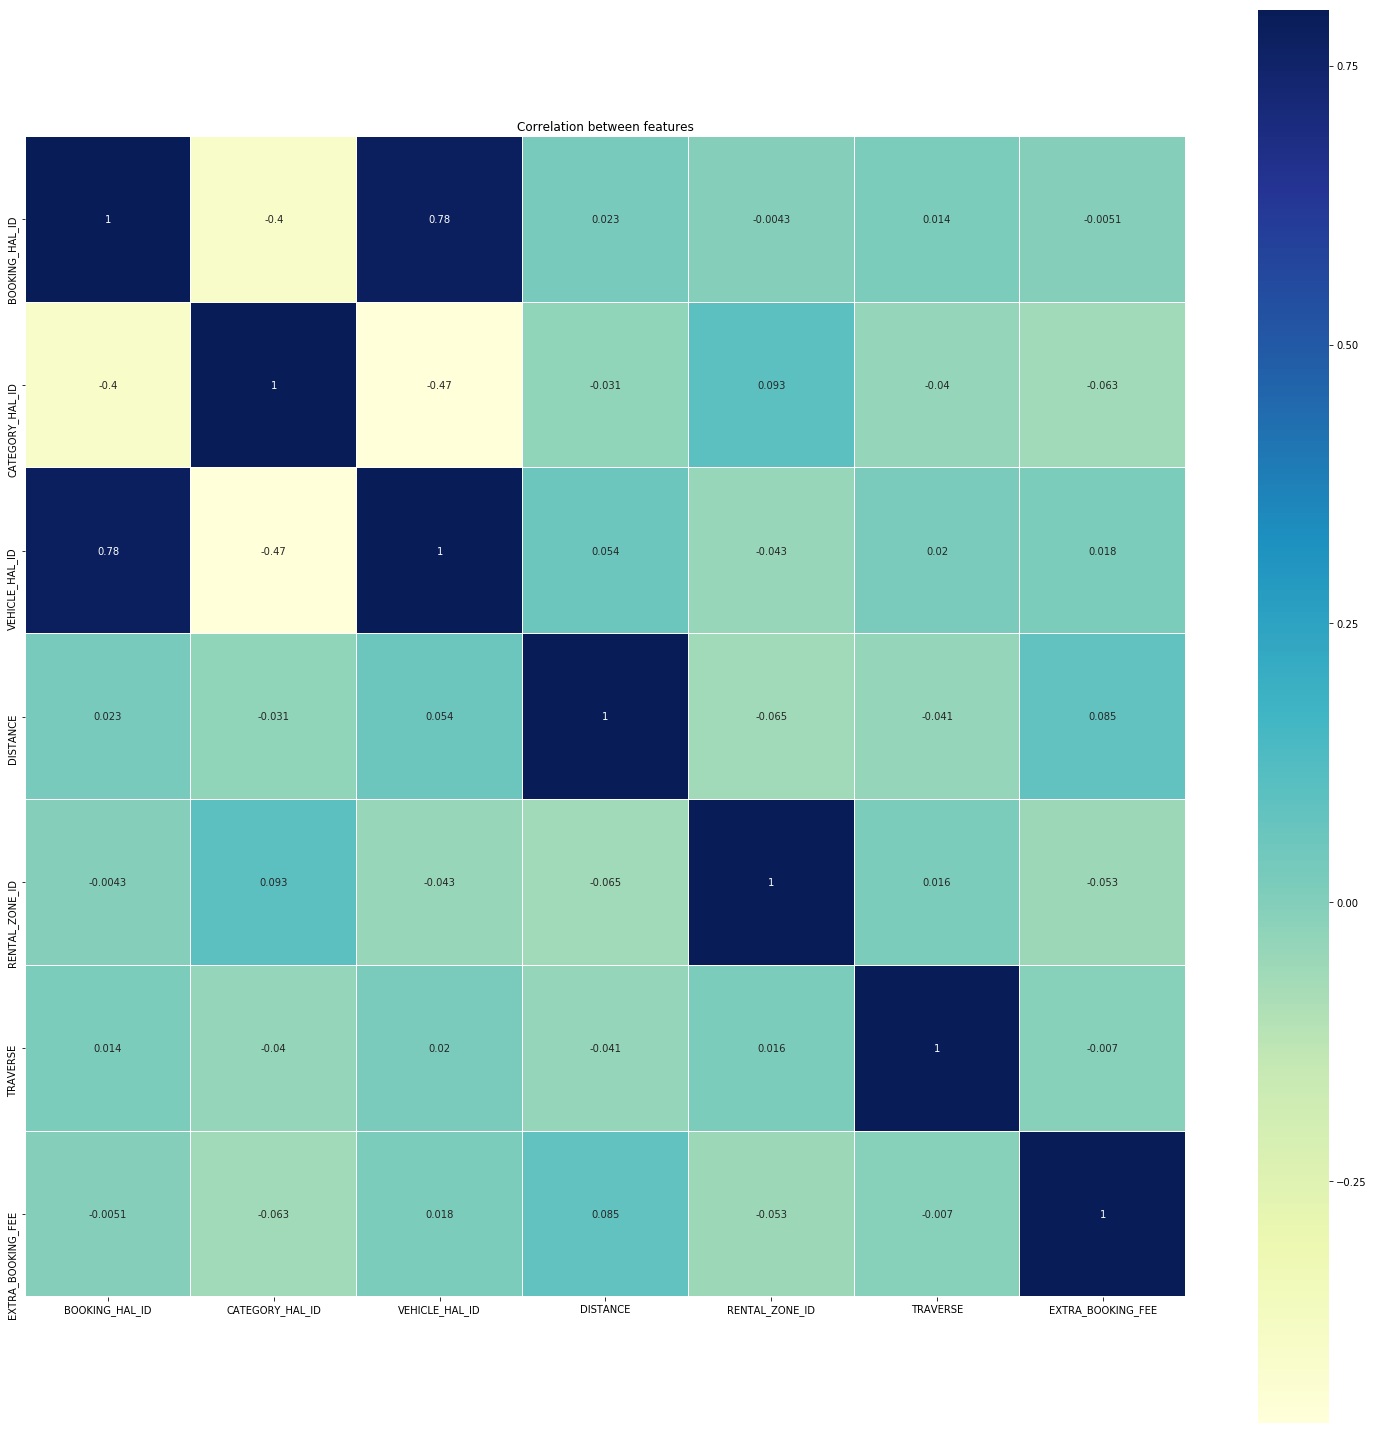

In [43]:
corr=carmerge.corr()
plt.figure(figsize=(26, 26))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [8]:
db_data['CUSTOMER_HAL_ID'].describe()
# The customer F84361D042B7994A0B18B6ABD3E1ABCC8064B172 is the most important customer with total 2801 bookings.

count                                       548073
unique                                       56686
top       F84361D042B7994A0B18B6ABD3E1ABCC8064B172
freq                                          2801
Name: CUSTOMER_HAL_ID, dtype: object

In [9]:
#count the total no. of unique values of the customers
#db_data["CUSTOMER_HAL_ID"].value_counts()
db_data['RENTAL_ZONE_HAL_SRC'].value_counts() # all the values are the same.

1    548073
Name: RENTAL_ZONE_HAL_SRC, dtype: int64

In [98]:
carmerge['DATE_BOOKING'] = pd.to_datetime(carmerge.DATE_BOOKING)
carmerge['Date'] = carmerge.DATE_BOOKING.dt.date
carmerge['Y'] = carmerge.DATE_BOOKING.dt.year
#carmerge['D'] = carmerge.DATE_BOOKING.dt.day
carmerge['WD'] =carmerge.DATE_BOOKING.dt.weekday
#carmerge['BOOKING_DATE'] = carmerge.DATE_BOOKING.datetime.strptime('2013-6-05', '%Y %m %d').strftime('%d-%m-%Y')
carmerge

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,DISTANCE,RENTAL_ZONE,RENTAL_ZONE_ID,...,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,TRAVERSE,EXTRA_BOOKING_FEE,CATEGORY,Y,M,D,WD,Date
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,14.0,Bernkasteler Straße,401768,...,Köln,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,6,5,2,2013-06-05
1,19054992,100012,151333,645B3B221397740C5DD3ACE9915B28D717697D1F,2013-06-25 14:12:08,2014-06-14 14:00:00,2014-06-22 10:30:00,1036.0,Hbf Stralsund,32961,...,Stralsund,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,6,25,1,2013-06-25
2,19923967,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-08-01 07:20:47,2014-01-05 14:00:00,2014-01-05 15:30:00,0.0,Bernkasteler Straße,401768,...,Köln,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,8,1,3,2013-08-01
3,19960704,100012,150715,E1B1BF157BDEF3542D79DC7EDF30437B9DC69B4A,2013-08-01 09:22:07,2014-01-11 09:45:00,2014-01-11 16:15:00,0.0,Hbf 1 Siegburg (Wilhelmstr.),400263,...,Siegburg,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,8,1,3,2013-08-01
4,20263201,100012,150782,CAD3A8B07B1103B402AB30FA2EA1925821A6EABE,2013-08-13 10:28:38,2014-03-26 18:00:00,2014-03-27 06:30:00,0.0,Hbf Offenburg,400575,...,Offenburg,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,8,13,1,2013-08-13
5,20263220,100012,150782,CAD3A8B07B1103B402AB30FA2EA1925821A6EABE,2013-08-13 10:29:24,2014-04-08 17:00:00,2014-04-09 06:15:00,56.0,Hbf Offenburg,400575,...,Offenburg,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,8,13,1,2013-08-13
6,20350059,100012,151335,7A74D1CF5B58FE0253A4CFC9424C7AB96233C816,2013-08-21 18:36:12,2014-01-03 20:30:00,2014-01-06 16:15:00,42.0,Flughafen Berlin Tegel,400610,...,Flugh. Berlin,Internet,1,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,8,21,2,2013-08-21
7,20390491,100012,150682,DA740D2EACD1FB25C8B67FF6153E415C0FA5C60F,2013-08-23 00:14:48,2014-01-28 09:45:00,2014-01-28 15:45:00,87.0,Bhf Echterdingen,401910,...,Stuttgart,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,8,23,4,2013-08-23
8,20432414,100012,150720,6963D98A29F5A106B65E316EC10486991331D1BF,2013-09-15 12:19:14,2014-01-17 11:15:00,2014-01-17 17:15:00,218.0,Parkraumquartier Lerchenauer Straße,402766,...,München,Internet,1,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,9,15,6,2013-09-15
9,20432423,100012,150720,6963D98A29F5A106B65E316EC10486991331D1BF,2013-09-17 17:59:03,2014-01-24 11:15:00,2014-01-24 17:30:00,219.0,Parkraumquartier Lerchenauer Straße,402766,...,München,Internet,1,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,9,17,1,2013-09-17


In [101]:
carmerge['Date'].unique()

array([datetime.date(2013, 6, 5), datetime.date(2013, 6, 25),
       datetime.date(2013, 8, 1), ..., datetime.date(2017, 5, 2),
       datetime.date(2017, 5, 3), datetime.date(2017, 5, 4)], dtype=object)

# Considering Other Factors:

# 1) Population

In [46]:
population =  pd.read_csv("C:/Users/arora/data carbooking/POP.csv", sep = ';', header = 0)
population

,CITY_RENTAL_ZONE,POPULATION
0,Berlin,"3,275,000"
1,Hamburg,"1,686,100"
2,München,"1,185,400"
3,Köln,"965,300"
4,Frankfurt,"648,000"
5,Essen,"588,800"
6,Dortmund,"587,600"
7,Stuttgart,"581,100"
8,Düsseldorf,"568,900"
9,Bremen,"527,900"


# Merging Population Data

In [47]:
popmerge = pd.merge(carmerge, population, on ='CITY_RENTAL_ZONE')
popmerge.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,DISTANCE,RENTAL_ZONE,RENTAL_ZONE_ID,...,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,TRAVERSE,EXTRA_BOOKING_FEE,CATEGORY,Y,M,D,WD,POPULATION
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,14.0,Bernkasteler Straße,401768,...,Köln,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,6,5,2,"965,300"
1,19923967,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-08-01 07:20:47,2014-01-05 14:00:00,2014-01-05 15:30:00,0.0,Bernkasteler Straße,401768,...,Köln,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,8,1,3,"965,300"
2,20453330,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-09-18 10:37:46,2014-03-16 18:15:00,2014-03-16 19:30:00,17.0,Bernkasteler Straße,401768,...,Köln,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,9,18,2,"965,300"
3,20761695,100012,150336,3FCEED3132998BAF8810A8B46DA3E7DA4871135F,2013-09-18 10:37:46,2014-01-09 10:30:00,2014-01-09 14:15:00,137.0,Bachemer Straße,401740,...,Köln,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,9,18,2,"965,300"
4,20799835,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-09-26 14:48:00,2014-01-06 17:00:00,2014-01-06 23:45:00,16.0,Bernkasteler Straße,401768,...,Köln,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,9,26,3,"965,300"


In [48]:
popmerge.apply(lambda x: len(x.unique()))

BOOKING_HAL_ID              516068
CATEGORY_HAL_ID                 13
VEHICLE_HAL_ID                1695
CUSTOMER_HAL_ID              52724
DATE_BOOKING                514097
DATE_FROM                    94192
DATE_UNTIL                  101918
DISTANCE                      1972
RENTAL_ZONE                    372
RENTAL_ZONE_ID                 377
RENTAL_ZONE_HAL_SRC              1
CITY_RENTAL_ZONE                59
TECHNICAL_INCOME_CHANNEL        39
TRAVERSE                         2
EXTRA_BOOKING_FEE                2
CATEGORY                        13
Y                                5
M                               12
D                               31
WD                               7
POPULATION                      59
dtype: int64

# 2) Holidays

In [6]:
Public_holidays =pd.read_csv("C:/Users/arora/data carbooking/publicHolidays.csv", sep = ',', header = 0)

In [7]:
Public_holidays

,Date,Public_Holidays
0,01-01-2018,New Year's Day
1,30-03-2018,Good Friday
2,02-04-2018,Easter Monday
3,01-05-2018,Labour Day
4,10-05-2018,Ascension Day
5,21-05-2018,Whit Monday
6,03-10-2018,German Unity Day
7,25-12-2018,Christmas Day
8,01-01-2017,New Year's Day
9,14-04-2017,Good Friday


In [14]:
#Public_holidays['Date'] = pd.to_datetime()
Public_holidays['Date'] = Public_holidays.Date.dt.date

AttributeError: Can only use .dt accessor with datetimelike values

# Merging Holidays Data

In [103]:
#checking the correlation between the columns:
Public_holidays['Date'].equals(carmerge['Date'])

False

In [118]:
pubHolmerge = pd.merge(carmerge, Public_holidays, how = 'left',left_on ='Date',right_on = 'Date')
pubHolmerge.head(70)

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,DISTANCE,RENTAL_ZONE,RENTAL_ZONE_ID,...,TECHNICAL_INCOME_CHANNEL,TRAVERSE,EXTRA_BOOKING_FEE,CATEGORY,Y,M,D,WD,Date,Public_Holidays
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,14.0,Bernkasteler Straße,401768,...,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,6,5,2,2013-06-05,NaN
1,19054992,100012,151333,645B3B221397740C5DD3ACE9915B28D717697D1F,2013-06-25 14:12:08,2014-06-14 14:00:00,2014-06-22 10:30:00,1036.0,Hbf Stralsund,32961,...,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,6,25,1,2013-06-25,NaN
2,19923967,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-08-01 07:20:47,2014-01-05 14:00:00,2014-01-05 15:30:00,0.0,Bernkasteler Straße,401768,...,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,8,1,3,2013-08-01,NaN
3,19960704,100012,150715,E1B1BF157BDEF3542D79DC7EDF30437B9DC69B4A,2013-08-01 09:22:07,2014-01-11 09:45:00,2014-01-11 16:15:00,0.0,Hbf 1 Siegburg (Wilhelmstr.),400263,...,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,8,1,3,2013-08-01,NaN
4,20263201,100012,150782,CAD3A8B07B1103B402AB30FA2EA1925821A6EABE,2013-08-13 10:28:38,2014-03-26 18:00:00,2014-03-27 06:30:00,0.0,Hbf Offenburg,400575,...,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,8,13,1,2013-08-13,NaN
5,20263220,100012,150782,CAD3A8B07B1103B402AB30FA2EA1925821A6EABE,2013-08-13 10:29:24,2014-04-08 17:00:00,2014-04-09 06:15:00,56.0,Hbf Offenburg,400575,...,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,8,13,1,2013-08-13,NaN
6,20350059,100012,151335,7A74D1CF5B58FE0253A4CFC9424C7AB96233C816,2013-08-21 18:36:12,2014-01-03 20:30:00,2014-01-06 16:15:00,42.0,Flughafen Berlin Tegel,400610,...,Internet,1,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,8,21,2,2013-08-21,NaN
7,20390491,100012,150682,DA740D2EACD1FB25C8B67FF6153E415C0FA5C60F,2013-08-23 00:14:48,2014-01-28 09:45:00,2014-01-28 15:45:00,87.0,Bhf Echterdingen,401910,...,Internet,0,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,8,23,4,2013-08-23,NaN
8,20432414,100012,150720,6963D98A29F5A106B65E316EC10486991331D1BF,2013-09-15 12:19:14,2014-01-17 11:15:00,2014-01-17 17:15:00,218.0,Parkraumquartier Lerchenauer Straße,402766,...,Internet,1,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,9,15,6,2013-09-15,NaN
9,20432423,100012,150720,6963D98A29F5A106B65E316EC10486991331D1BF,2013-09-17 17:59:03,2014-01-24 11:15:00,2014-01-24 17:30:00,219.0,Parkraumquartier Lerchenauer Straße,402766,...,Internet,1,0,Sonderklasse (Alfa MiTo / Citroën DS3),2013,9,17,1,2013-09-17,NaN


In [119]:
pubHolmerge.apply(lambda x: len(x.unique()))

BOOKING_HAL_ID              544573
CATEGORY_HAL_ID                 13
VEHICLE_HAL_ID                1785
CUSTOMER_HAL_ID              56524
DATE_BOOKING                542382
DATE_FROM                    97214
DATE_UNTIL                  104923
DISTANCE                      2011
RENTAL_ZONE                    411
RENTAL_ZONE_ID                 424
RENTAL_ZONE_HAL_SRC              1
CITY_RENTAL_ZONE                85
TECHNICAL_INCOME_CHANNEL        39
TRAVERSE                         2
EXTRA_BOOKING_FEE                2
CATEGORY                        13
Y                                5
M                               12
D                               31
WD                               7
Date                          1299
Public_Holidays                  1
dtype: int64

In [122]:
pubHolmerge['Public_Holidays'].unique()

array([nan], dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x184F6F50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0D45F5D0>], dtype=object)

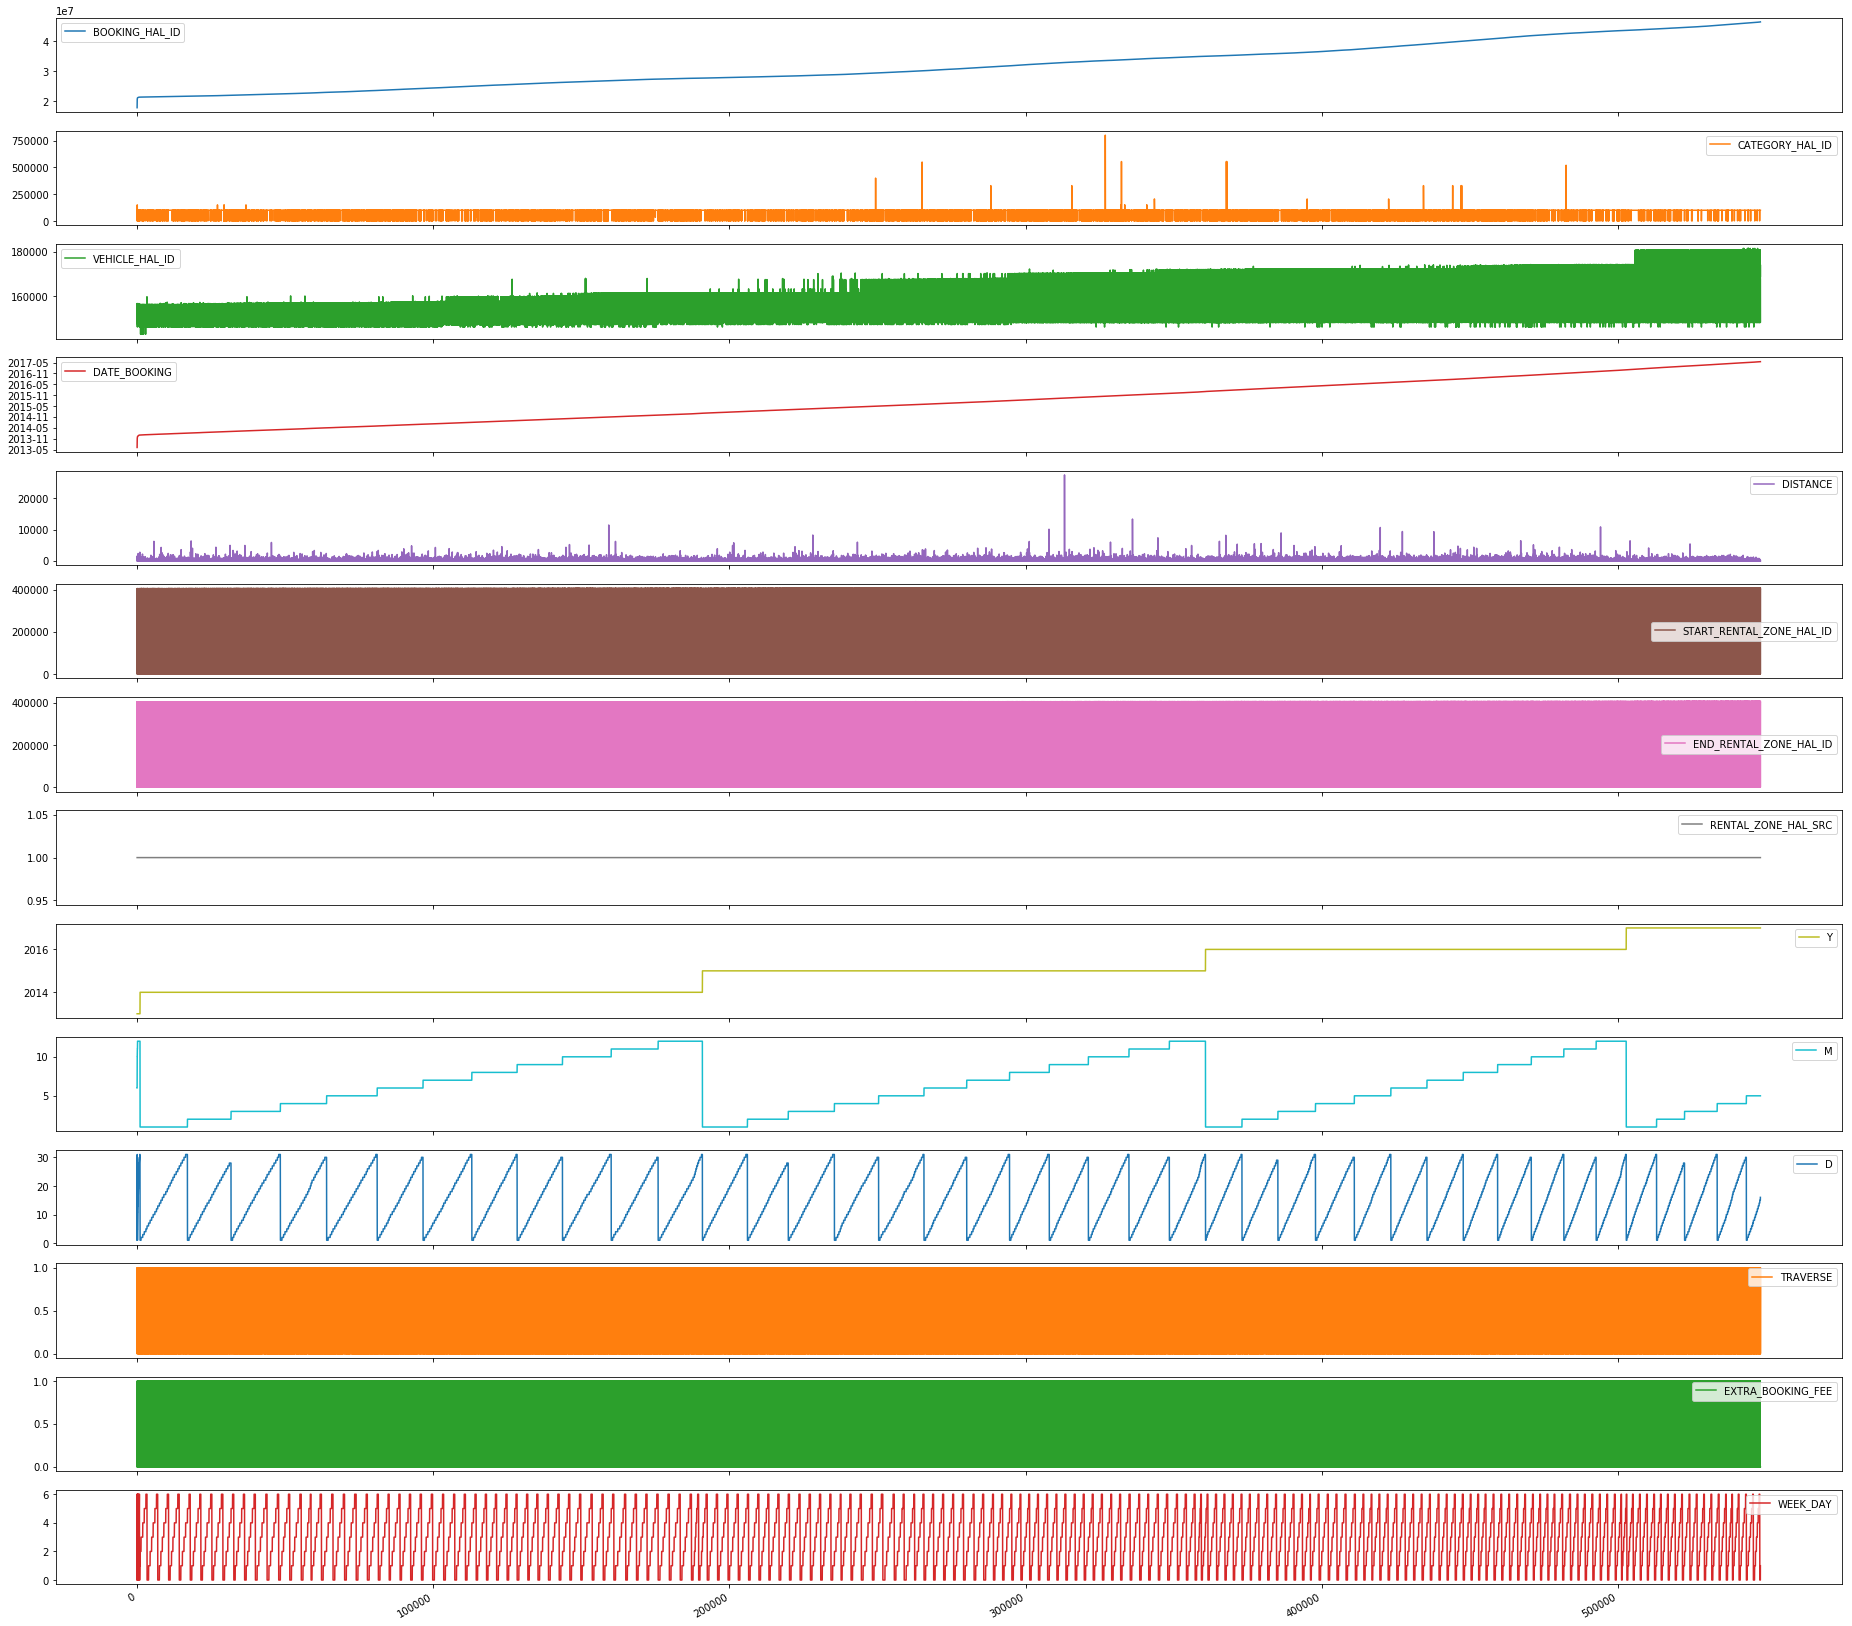

In [26]:
#plotting the no. of customers with the bookings.
db_data.plot(subplots =True, figsize =(32,32)) #x = db_data['BOOKING_HAL_ID'] , y = db_data['CUSTOMER_HAL_ID'])

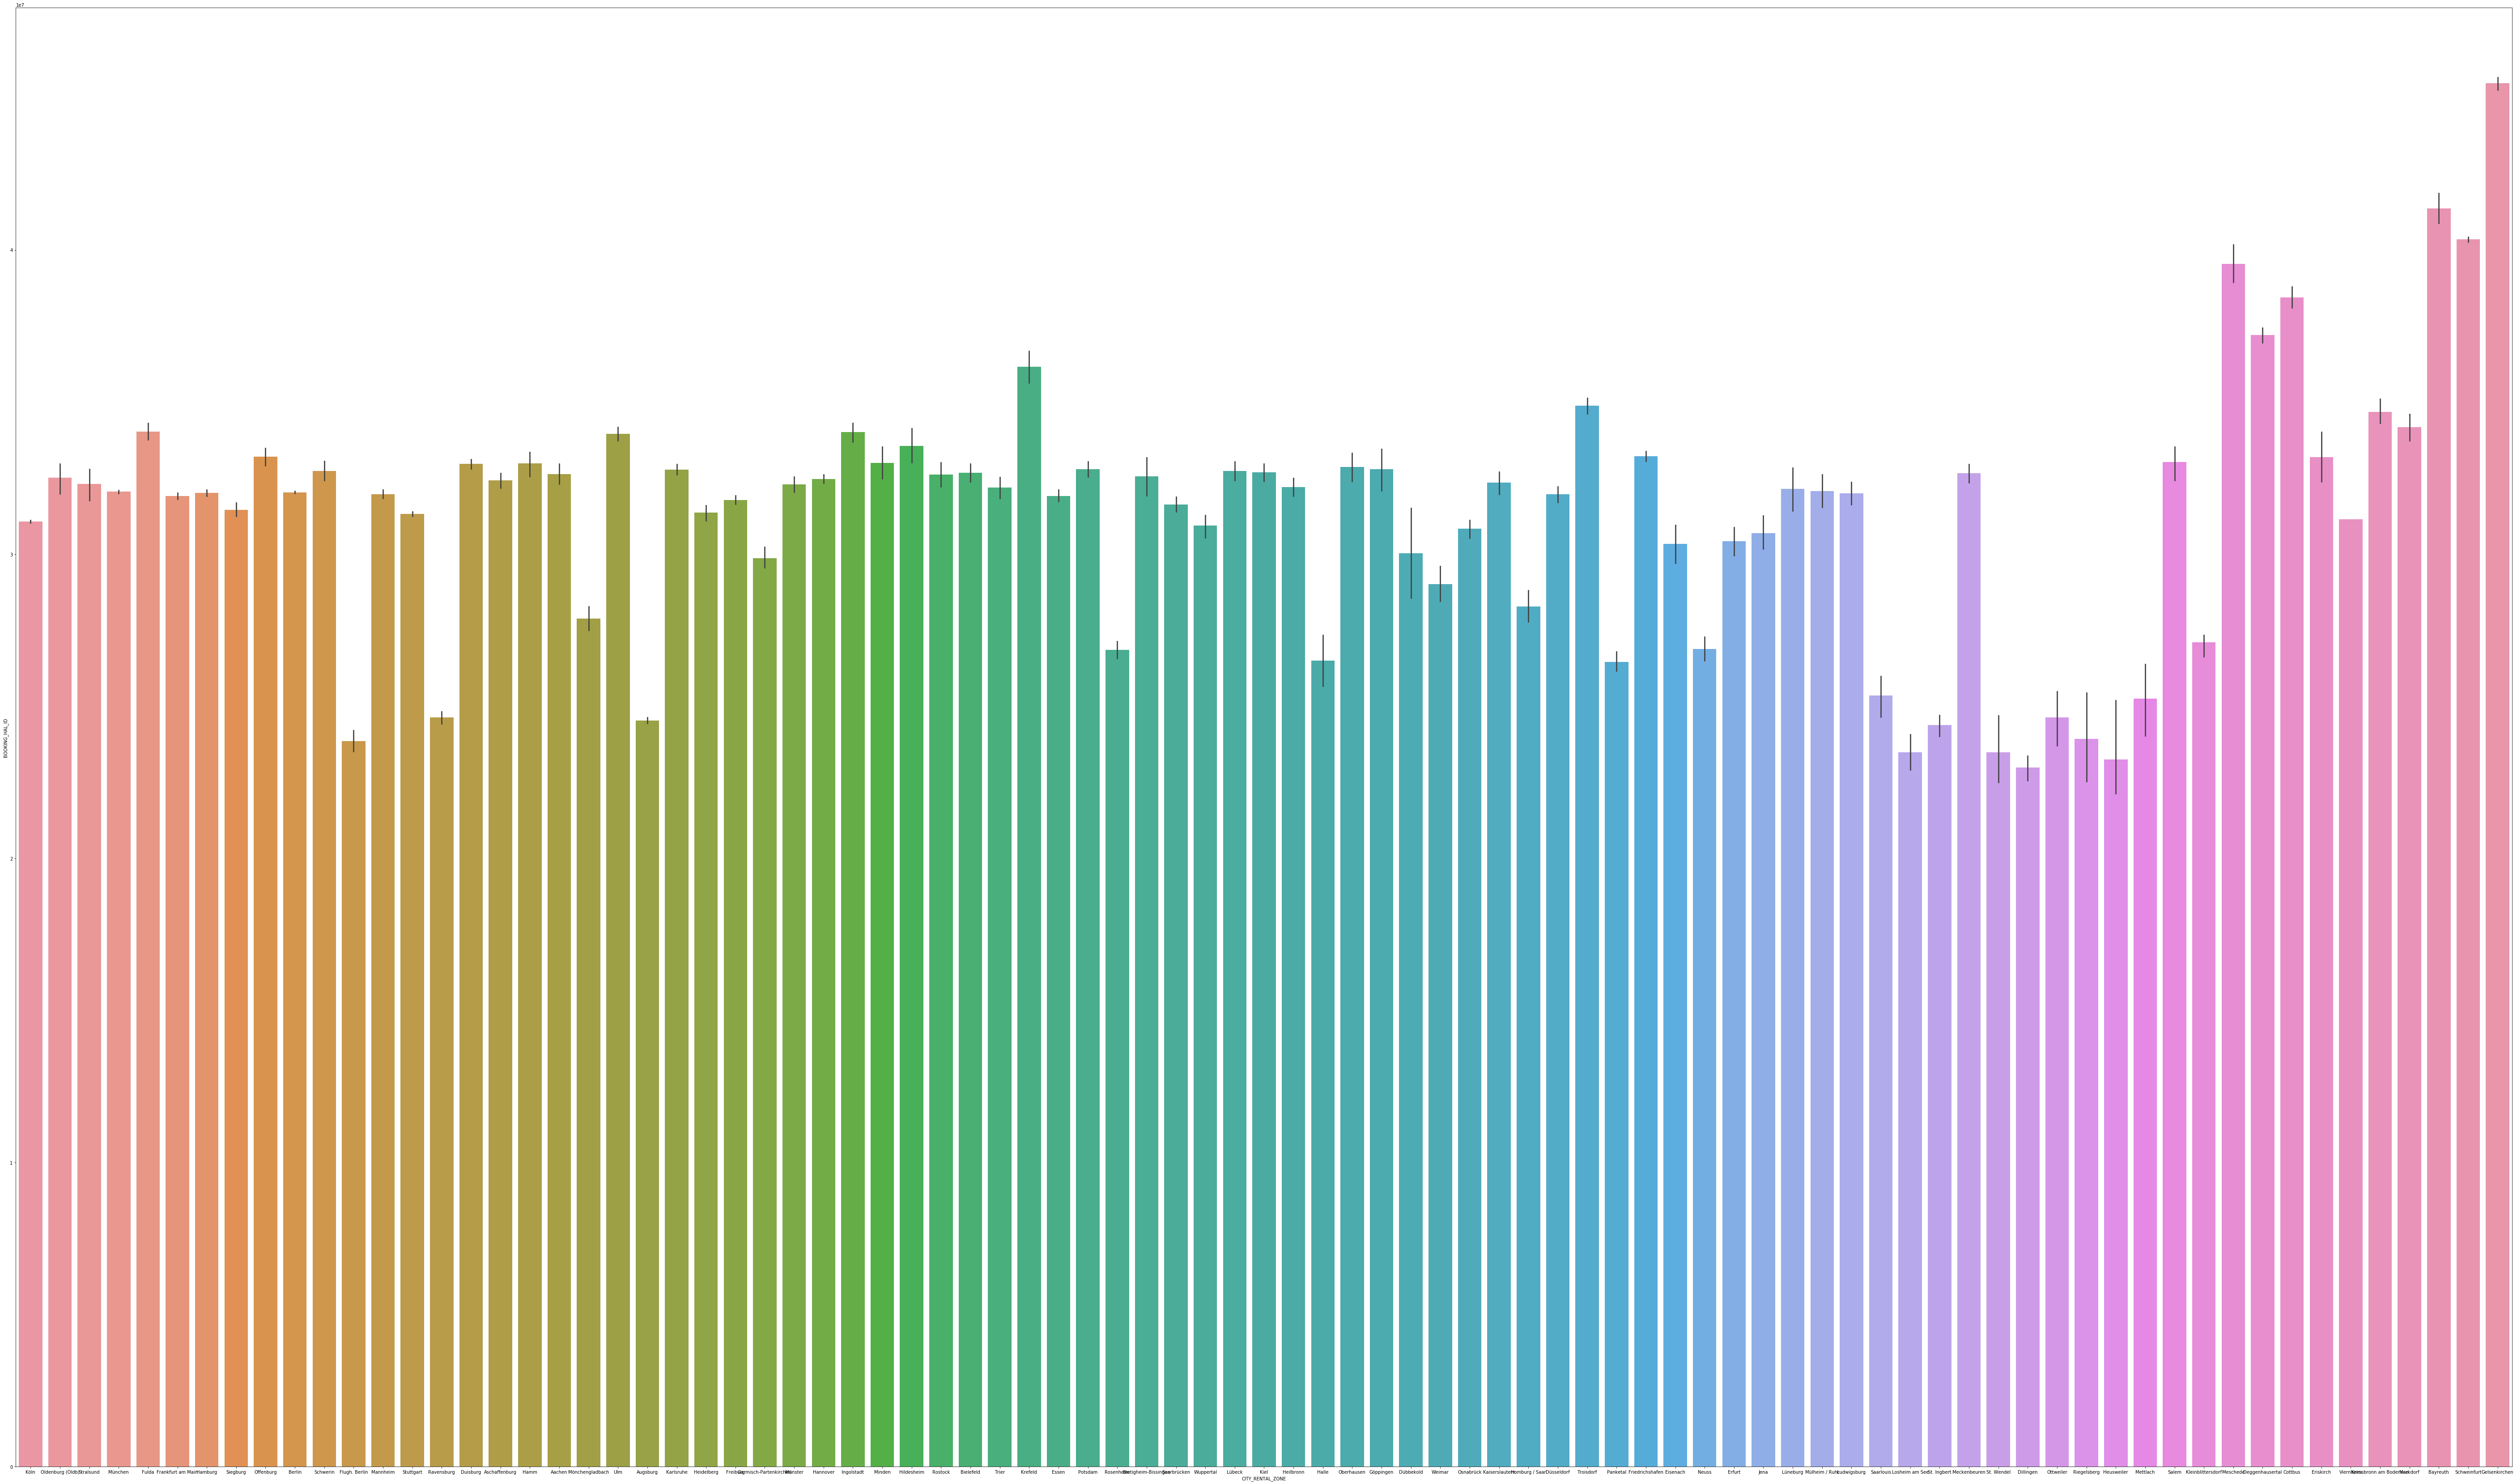

In [70]:
db_data['BOOKING_HAL_ID'].value_counts()
# all are unique value
plt.figure(figsize = (100,60))
sns.barplot(x = 'CITY_RENTAL_ZONE' , y = 'BOOKING_HAL_ID' , data = db_data)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000200E9370EF0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000200DDCA7C18>], dtype=object)

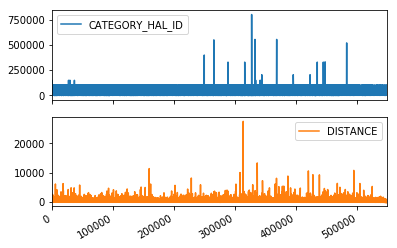

In [10]:
#list =['BOOKING_HAL_ID','CUSTOMER_HAL_ID']
#bookings_per_customer = db_data.pivot(index =['BOOKING_HAL_ID'] , values = 'CUSTOMER_HAL_ID')
#bookings_per_customer
db_data[['CATEGORY_HAL_ID', 'DATE_BOOKING','DISTANCE']].plot(subplots=True , legend = True)

In [51]:
carmerge.apply(lambda x: len(x.unique()))

BOOKING_HAL_ID              544573
CATEGORY_HAL_ID                 13
VEHICLE_HAL_ID                1785
CUSTOMER_HAL_ID              56524
DATE_BOOKING                542405
DATE_FROM                    97214
DATE_UNTIL                  104923
DISTANCE                      2011
RENTAL_ZONE                    411
RENTAL_ZONE_ID                 424
RENTAL_ZONE_HAL_SRC              1
CITY_RENTAL_ZONE                85
TECHNICAL_INCOME_CHANNEL        39
TRAVERSE                         2
EXTRA_BOOKING_FEE                2
CATEGORY                        13
dtype: int64